In [20]:
import spacy
import json
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Initialize Porter Stemmer from NLTK
stemmer = PorterStemmer()


In [21]:
# This is just for testing purposes
data_dict = {'pass_summary': 'This is the first summary. This is the second summary.'}

# Extract the 'pass_summary' field
pass_summary = data_dict['pass_summary']

# Tokenization
doc = nlp(pass_summary)
tokens = [token.text for token in doc]
print("Tokens:", tokens)

# Lemmas
lemmas = [token.lemma_ for token in doc]
print("Lemmas:", lemmas)

# Stop words
stop_words = [token.text for token in doc if token.is_stop]
print("Stop Words:", stop_words)


Tokens: ['This', 'is', 'the', 'first', 'summary', '.', 'This', 'is', 'the', 'second', 'summary', '.']
Lemmas: ['this', 'be', 'the', 'first', 'summary', '.', 'this', 'be', 'the', 'second', 'summary', '.']
Stop Words: ['This', 'is', 'the', 'first', 'This', 'is', 'the']


In [22]:

# Read JSONL file and process each line
with open('amazon_product_pass_summary.jsonl', 'r') as f:
    for line_number, line in enumerate(f, start=1):
        data = json.loads(line.strip())
        
        # Extract pass_summary field for text analysis
        pass_summary = data.get('pass_summary', 'Key not found')

        # Initialize Spacy Doc
        doc = nlp(pass_summary)
        
        # Extract tokens, lemmas, and stop words
        tokens = [token.text for token in doc]
        lemmas = [token.lemma_ for token in doc]
        stop_words_removed = [token.text for token in doc if not token.is_stop]
        stemmed_words = [stemmer.stem(token.text) for token in doc]

        # Display the data
        print(f"===== Line {line_number} =====")
        print(f"Pass Summary: {pass_summary}")
        print(f"Tokens: {' | '.join(tokens)}")
        print(f"Lemmas: {' | '.join(lemmas)}")
        print(f"Stop Words Removed: {' | '.join(stop_words_removed)}")
        print(f"Stemmed Words: {' | '.join(stemmed_words)}")
        print("===== End of Line =====\n")


===== Line 1 =====
Pass Summary: These soft, breathable tights are great for transitioning from tap to ballet. They fit snugly around the body and stay in place when worn with ballet shoes. They are well made and well made, and can last longer than other tights available. The colors are beautiful and will definitely be purchasing again.
Tokens: These | soft | , | breathable | tights | are | great | for | transitioning | from | tap | to | ballet | . | They | fit | snugly | around | the | body | and | stay | in | place | when | worn | with | ballet | shoes | . | They | are | well | made | and | well | made | , | and | can | last | longer | than | other | tights | available | . | The | colors | are | beautiful | and | will | definitely | be | purchasing | again | .
Lemmas: these | soft | , | breathable | tight | be | great | for | transition | from | tap | to | ballet | . | they | fit | snugly | around | the | body | and | stay | in | place | when | wear | with | ballet | shoe | . | they 

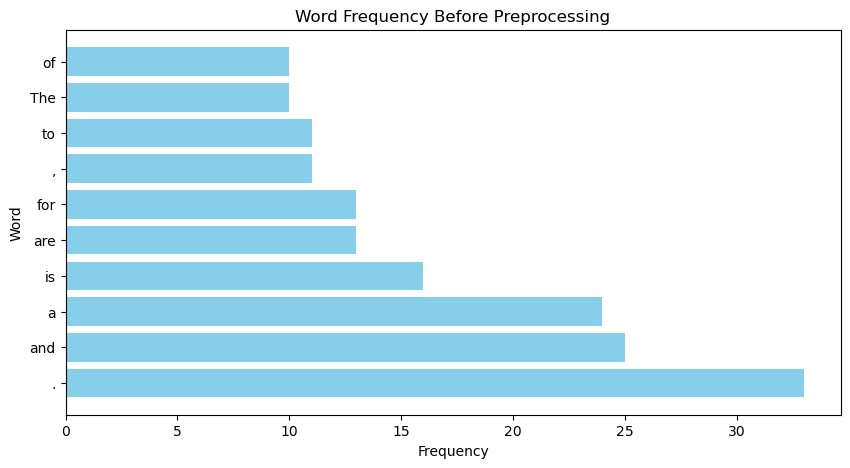

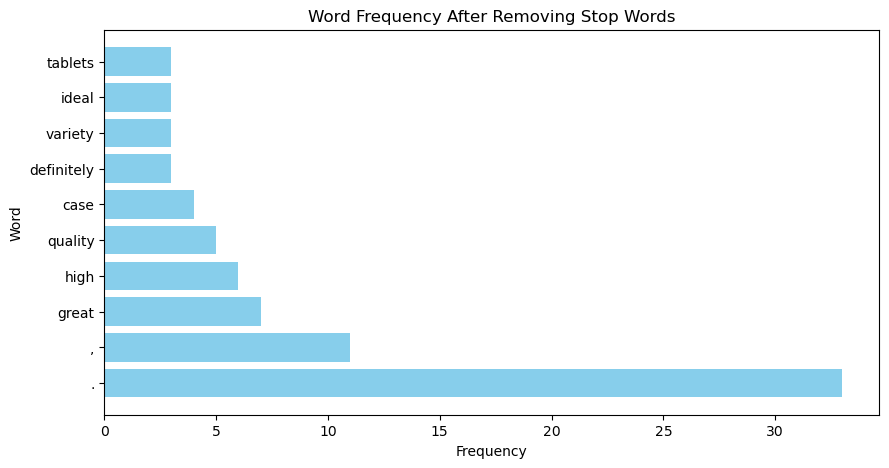

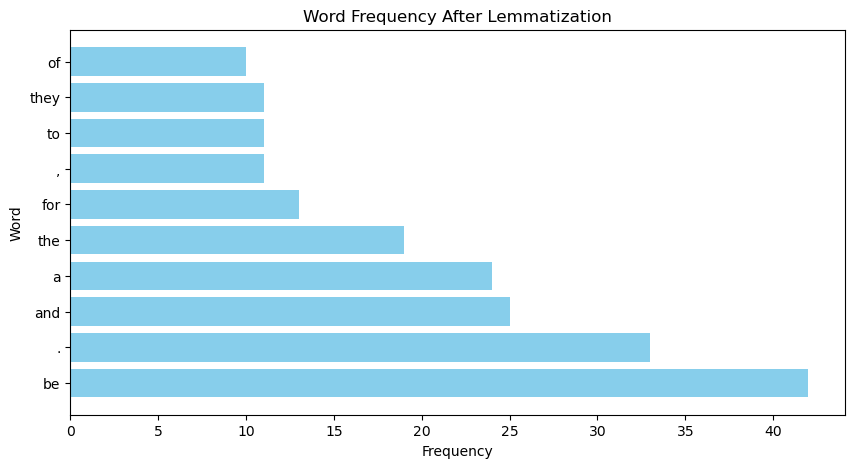

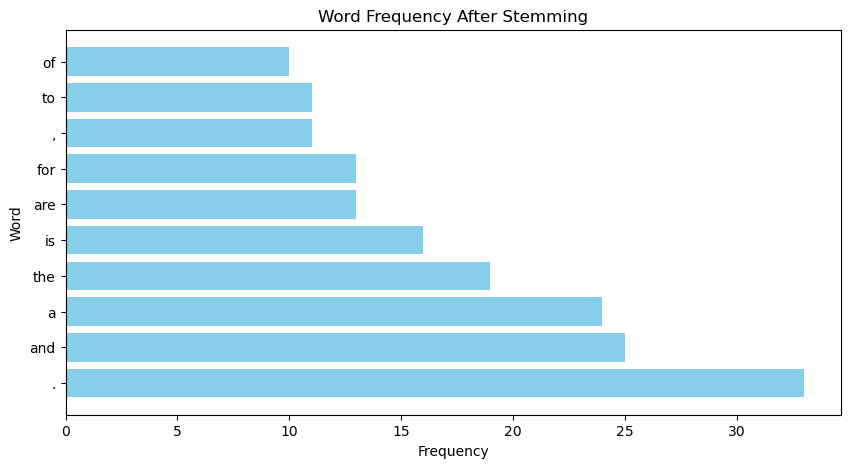

In [23]:


def plot_word_frequencies(word_list, title):
    word_freq = Counter(word_list)
    common_words = word_freq.most_common(10)
    
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]
    
    plt.figure(figsize=(10,5))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(title)
    plt.show()

# Initialize counters
original_text_counter = Counter()
stopwords_removed_counter = Counter()
lemmatized_counter = Counter()
stemmed_counter = Counter()

with open('amazon_product_pass_summary.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line.strip())
        pass_summary = data.get('pass_summary', 'Key not found')
        doc = nlp(pass_summary)

        tokens = [token.text for token in doc]
        lemmas = [token.lemma_ for token in doc]
        stop_words_removed = [token.text for token in doc if not token.is_stop]
        stemmed_words = [stemmer.stem(token.text) for token in doc]

        original_text_counter.update(tokens)
        stopwords_removed_counter.update(stop_words_removed)
        lemmatized_counter.update(lemmas)
        stemmed_counter.update(stemmed_words)

# Plot the top 10 most common words for each counter
plot_word_frequencies(original_text_counter.elements(), 'Word Frequency Before Preprocessing')
plot_word_frequencies(stopwords_removed_counter.elements(), 'Word Frequency After Removing Stop Words')
plot_word_frequencies(lemmatized_counter.elements(), 'Word Frequency After Lemmatization')
plot_word_frequencies(stemmed_counter.elements(), 'Word Frequency After Stemming')
